In [1]:
import pickle
import numpy as np
import extract_features
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

with open('../models/neural_network/matrix_9x9/left.pkl', 'rb') as f: 
    left = pickle.load(f)
with open('../models/neural_network/matrix_9x9/right.pkl', 'rb') as f: 
    right = pickle.load(f)    

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


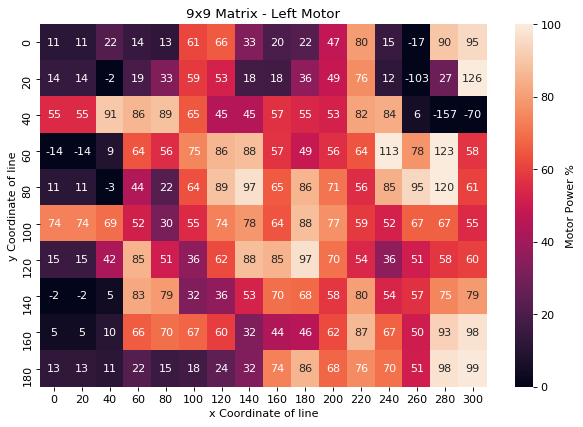

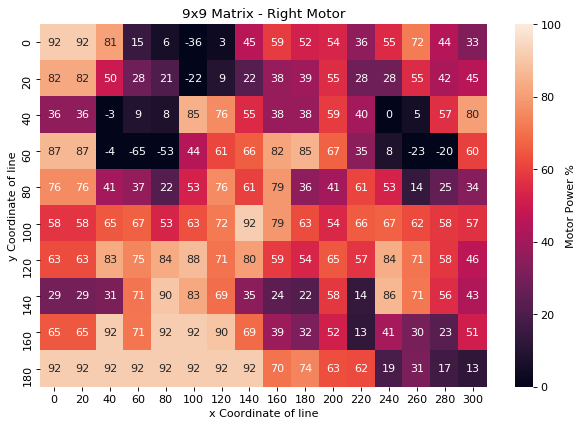

In [2]:
ext = extract_features.ExtractFeatures(9)

for model, title in zip([left,right],["9x9 Matrix - Left Motor", "9x9 Matrix - Right Motor"]):

    # build matrix of predictions for every x,y coord
    # in 0 <= x <= 320, 0 <= y <= 200
    predictions = []

    for y in np.arange(0,200,20):
        y_pred  = []
        for x in np.arange(0,320,20):
            extracted = np.asarray( ext.from_frame([[0,0,x,y,20,20]]) ).flatten().tolist()
            y_pred.append( model.predict([extracted])[0] )
        predictions.append(y_pred)

    # plot predictions on heatmap
    plt.figure(dpi=80,figsize=(9,6))    
    hm = sns.heatmap(predictions,vmin=0,vmax=100,annot=True,cbar=True, cbar_kws={'label': 'Motor Power %'}, fmt=".0f", xticklabels=np.arange(0,320,20), yticklabels=np.arange(0,200,20))
    plt.xlabel("x Coordinate of line")
    plt.ylabel("y Coordinate of line")
    plt.title(title)